# Netflix Movies and TV Shows Data Analysis

## Project Overview
This project focuses on analyzing the Netflix Movies and TV Shows dataset to understand content distribution, release trends, ratings, duration patterns, and country-wise availability. The analysis is performed using Python libraries such as Pandas for data manipulation and Matplotlib for data visualization.

## Objectives
- To compare the number of Movies and TV Shows available on Netflix  
- To analyze content trends across different release years  
- To study content ratings and movie duration patterns  
- To identify top countries producing Netflix content  

## Dataset Description
- Dataset Name: Netflix Movies and TV Shows  
- File Used: `netflix_titles.csv`  
- Source: Kaggle  
- Data Fields: Type, Title, Release Year, Rating, Duration, Country, Genre  


## Tools & Technologies Used
- Python  
- Pandas  
- Matplotlib  
- Jupyter Notebook  


---


In [5]:
# Import required libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Netflix Movies and TV Shows datasetdf = pd.read_csv(
    r"netflix_titles.csv"
)

In [4]:
 print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
# cleaning data 
# Remove rows with missing values in key columns to ensure clean analysis
df = df.dropna(subset=['type','release_year','rating','country','duration'])

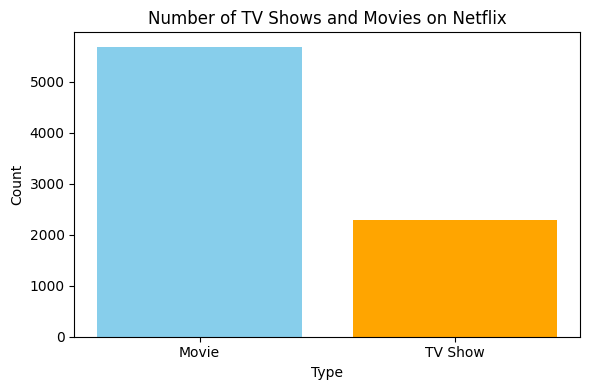

In [6]:
# Count number of Movies and TV Shows available on Netflix

type_count = df['type'].value_counts()   # counts movies and TV shows

plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['skyblue','orange'])
plt.title("Number of TV Shows and Movies on Netflix")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('bar_chart_comparison_between_movies_tvshow.png')
plt.show()


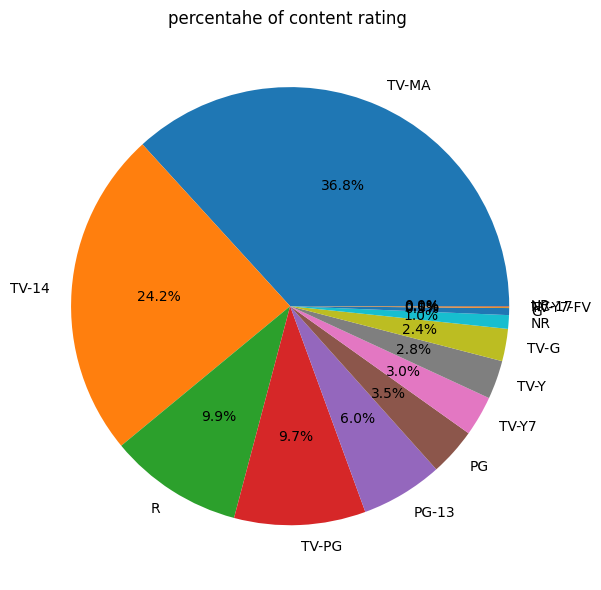

In [7]:
# pie chart 
# Calculate distribution of content ratings

rating_count = df['rating'].value_counts()   

plt.figure(figsize=(8,6))
plt.pie(rating_count, labels= rating_count.index,autopct='%1.1f%%',)
plt.title("percentahe of content rating ")
plt.tight_layout()
plt.savefig('rating_pie.png')
plt.show()

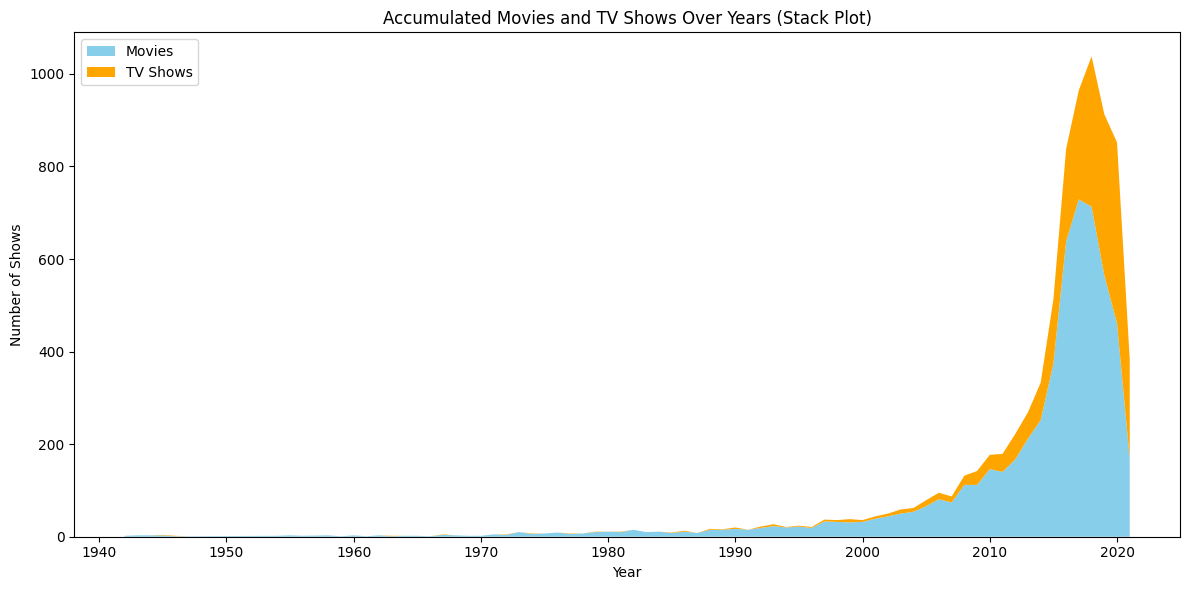

In [21]:

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
plt.stackplot(content_by_year.index, 
              content_by_year['Movie'], 
              content_by_year['TV Show'], 
              labels=['Movies','TV Shows'], colors=['skyblue','orange'])
plt.title("Accumulated Movies and TV Shows Over Years (Stack Plot)")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('stackplot_movies_tvshows.png')
plt.show()






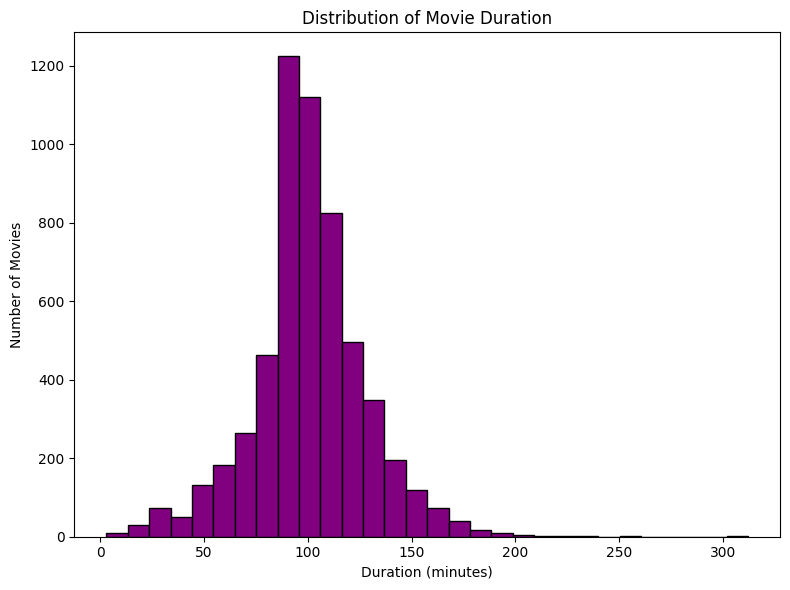

In [13]:
# Filter only Movies and convert duration from text to integer minutes

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

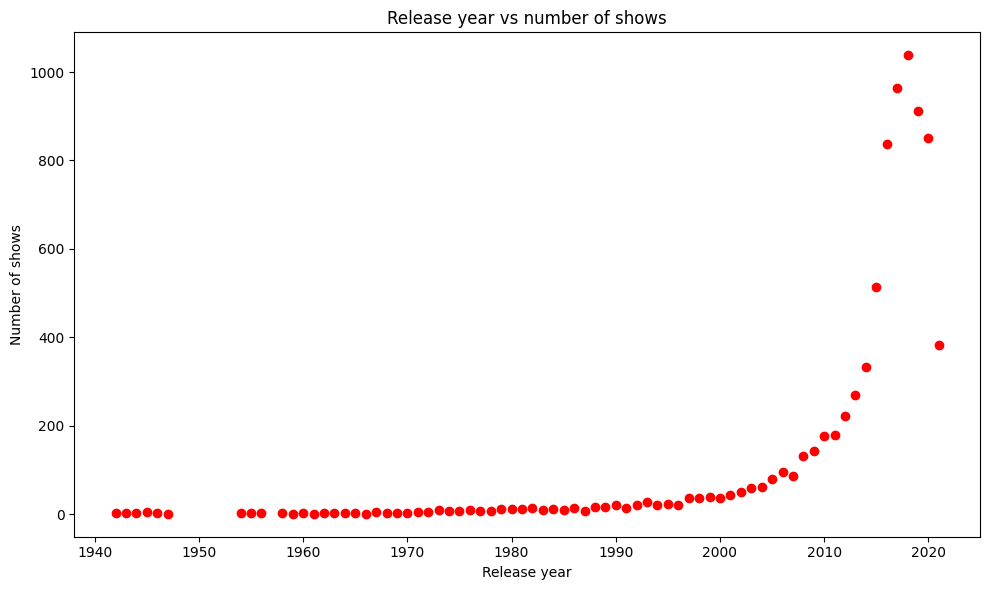

In [15]:
# Analyze number of titles released each year
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release year vs number of shows')
plt.xlabel('Release year')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.savefig('release_year_noshow.png')
plt.show()


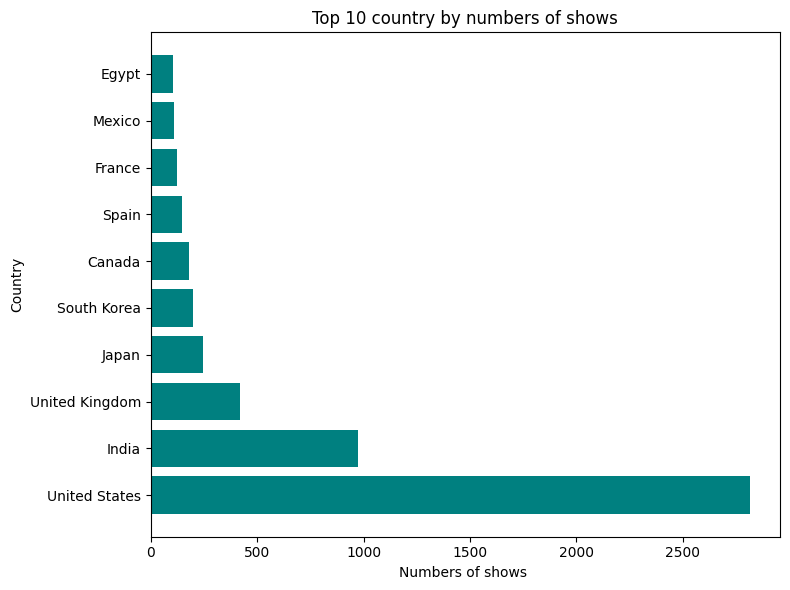

In [16]:
# Identify top 10 countries producing the most Netflix content

country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index , country_count.values , color = 'teal')
plt.title('Top 10 country by numbers of shows')
plt.xlabel('Numbers of shows ')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_country.png')
plt.show()

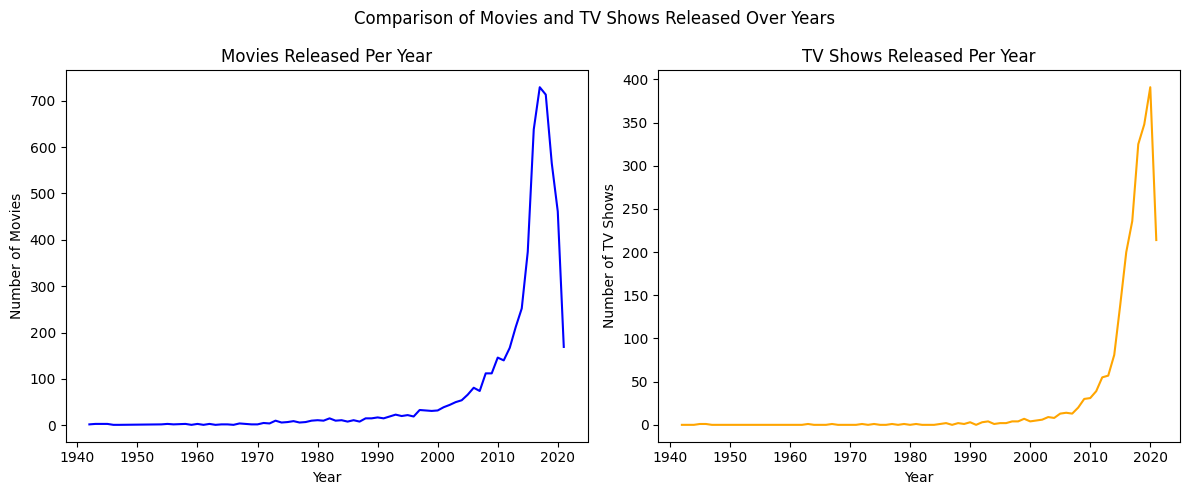

In [17]:
# Compare yearly release trends of Movies and TV Shows

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()


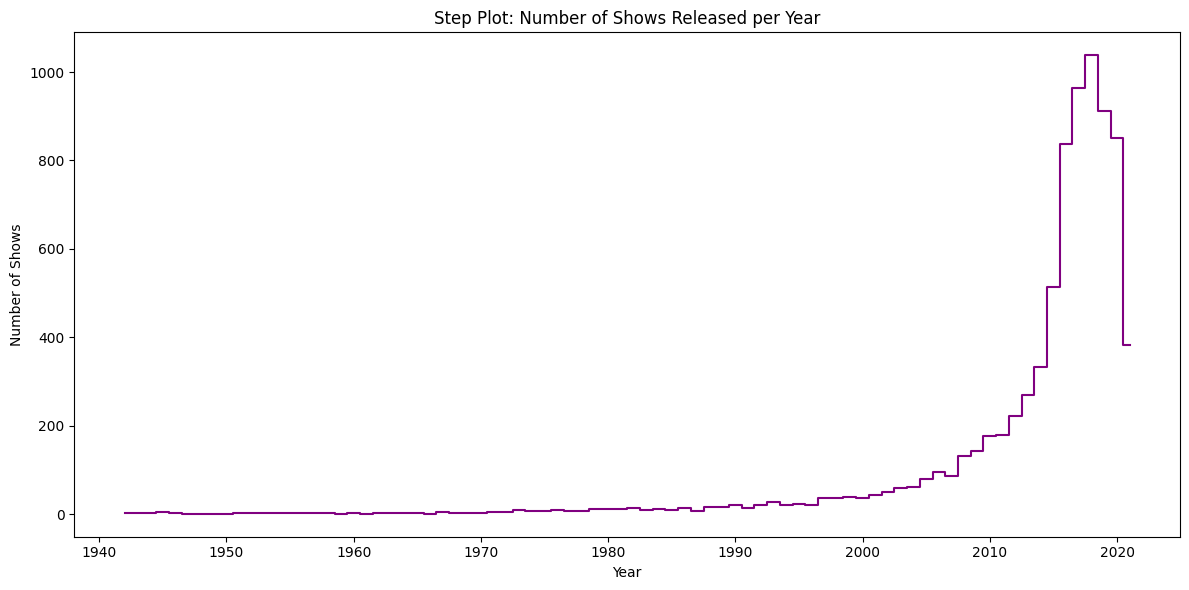

In [22]:
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.step(release_counts.index, release_counts.values, where='mid', color='purple')
plt.title("Step Plot: Number of Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('stepplot_release_year.png')
plt.show()


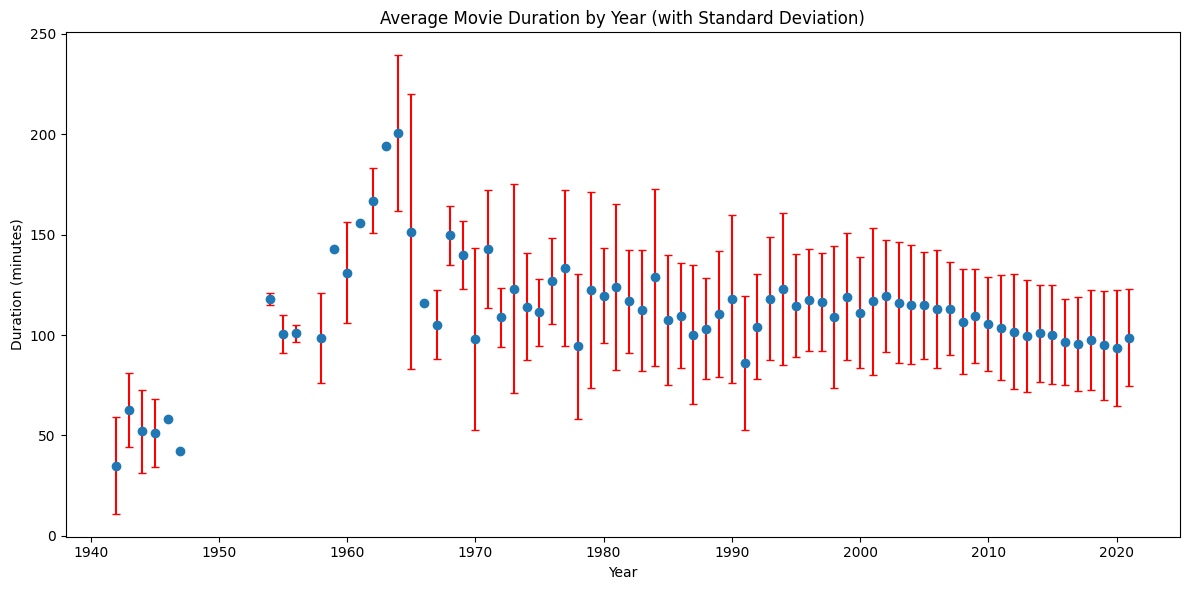

In [23]:
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)
avg_duration = movie_df.groupby('release_year')['duration_int'].mean()
std_duration = movie_df.groupby('release_year')['duration_int'].std()

plt.figure(figsize=(12,6))
plt.errorbar(avg_duration.index, avg_duration.values, yerr=std_duration.values, fmt='o', ecolor='red', capsize=3)
plt.title("Average Movie Duration by Year (with Standard Deviation)")
plt.xlabel("Year")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.savefig('errorbar_duration.png')
plt.show()



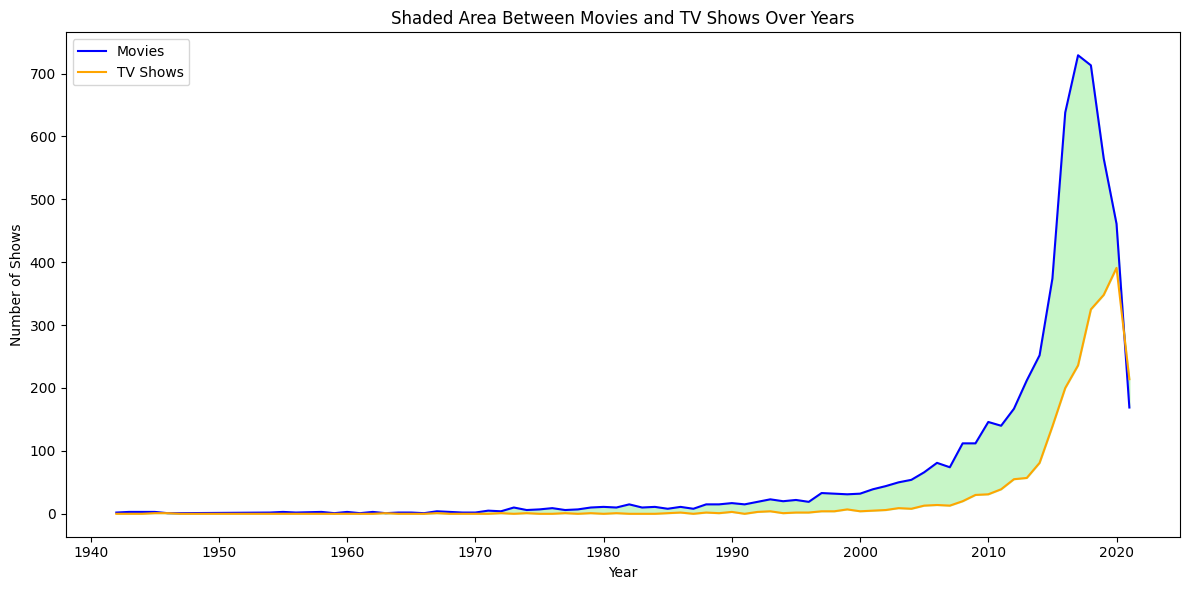

In [24]:
plt.figure(figsize=(12,6))
plt.fill_between(content_by_year.index, 
                 content_by_year['Movie'], 
                 content_by_year['TV Show'], 
                 color='lightgreen', alpha=0.5)
plt.plot(content_by_year.index, content_by_year['Movie'], color='blue', label='Movies')
plt.plot(content_by_year.index, content_by_year['TV Show'], color='orange', label='TV Shows')
plt.title("Shaded Area Between Movies and TV Shows Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.legend()
plt.tight_layout()
plt.savefig('fillbetween_movies_tvshows.png')
plt.show()


## Conclusion

This project analyzed the Netflix Movies and TV Shows dataset using Python, Pandas, and Matplotlib. 
The analysis shows that movies form a larger portion of Netflix’s content library, while TV shows have increased significantly in recent years. 
Most content is produced by a few leading countries, indicating regional dominance in content creation. 
Overall, the project demonstrates how data analysis can be used to extract meaningful insights from real-world datasets.
